# Direct reduction of iron ore with hydrogen 


<img src="DRI_fig
.jpg">

## Weights of raw material input in the shaft furnace

1. It has been assumed 5% impurities are present in the raw materials. The assumption is consisten with the plant data available in the literature. Primary components of the impurities are silica and alumina.
2. It is assumed that the output from the shaft furnace would be metallic Fe and FeO. It is also assumed that all the FeO will be reduced to pure iron in the electric arc furnace. Although, in practice some amount of FeO does not get reduced and becomed a part of the EAF slag.
3. The ratio between metallic iron and iron oxide (FeO) is called the metallization rate of the furnace. Higher the metallization rate, higher will be the metallic iron content in the DRI output. 
4. Hydrogen at high temperature is considered to be the source of energy for the reactions inside the shaft furnace.
5. The iron ore pellets are heated from ambient temperature to 800 C , which is the reaction temperature. 
6. The flow rate of hydrogen is considered to be higher than the stocihiometric requirements. The ratio between the actual flow rate and the stoichiometric flow rate required for the reaction to occur is represented as lambda_h2 in the model.
7. Solid stream exiting the DRI shaft furnace is considered to be at a high temperature (upto 600 C). The enthalpy of the solid stream increases with temperature.
8. The exahust gas stream is assumed to be composed of hydrogen and water. The waste stream enthalpy varies with different exhaust gas temperature and lambda_h2.
9. The energy balance between incoming energy from the hydrogen stream and outgoing streams and reaction enthalpy required for one ton of liquid steel has been calculated in this model.
10. Different values of metallization rate, input temperature of hydrogen, lambda_h2, exhaust gas temperature, and solid stream temperature have been modeled. 
11. A test case based on input values corresponding to a syn gas based DRI shaftfurnace will be considered for data validation. 

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
alpha=[0.94,0.93,0.92,0.91,0.90,0.89] # Metallization rates considered for the DRI reduction shaft furnace
Total_fe2O3=0.95 # Percentage of hematite in the raw material. 5% Impurities are considered in the iron ore which gets transferred into the EAF as it is 
iron_oxygen_ratio=112/160 # percentage of iron in one mole of iron ore 
iron_ore_dri=1/(Total_fe2O3*iron_oxygen_ratio)# Weight of total iron ore fed to the DRI and EAF to get 1 ton of liquid steel
Feo_percentage=[]
for i in range(6):
    Feo_percentage.append(iron_ore_dri*Total_fe2O3*(1-alpha[i])*iron_oxygen_ratio) # Depends on the slag content , metallization rate 
print("FeO percentage :",Feo_percentage)
SIO2_percentage=3 # Percentage of silica in the Slag 
Al2O3_percentage=2 #Percentage of alumina in the Slag
#CAO_percentage=4.5 #Percentage of lime added in the EAF slag is higher for DRI as the gangue content is higher making the system acidic
#MGO_percentage=0.53 #Percentage of Magnesium oxide in the EAF slag
SIO2_weight=(iron_ore_dri*SIO2_percentage)/100 # SiO2 weight in ton 
AL2O3_weight=(iron_ore_dri*Al2O3_percentage)/100 # weight in ton
print("Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process :",iron_ore_dri)


FeO percentage : [0.06000000000000005, 0.06999999999999995, 0.07999999999999996, 0.08999999999999997, 0.09999999999999996, 0.10999999999999999]
Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process : 1.5037593984962407


## Molecular weight of raw materials fed to the shaft furnace

In [23]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams

## Energy required to heat the raw materials to 800 C

The raw materials (ore and impurities) are both heated from ambient temperature to 800 C, which is the reaction temperature. The heating can be through high temperature hydrogen feed or through the use of electrical heaters. 

In [24]:
T1_iron_ore=298 # K Ambient temperature / Temperature of the incoming iron pellets
T2_iron_ore=1073 # K Temperature of the iron ore for reduction process
T2_sio2=T2_iron_ore # Temperature of the iron ore for reduction process
T1_al2o3=T1_iron_ore #Ambient temperature / Temperature of the incoming iron pellets
T2_al2o3=T2_iron_ore #Temperature of the iron ore for reduction process
T1_sio2=T1_iron_ore
# Enethalpy calculations for the different raw materials fed to the shaft furnace.

def fe2o3_enthalpy_1(T):# T1 and T2 should be in the range of 298-950 K 
    t=T/1000
    A=93.43834
    B=108.3577
    C=-50.86447
    D=25.58683
    E=-1.611330
    F=-863.2094
    G=161.0719
    H=-825.5032 
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=150.6240
    B=0
    C=0
    D=0
    E=0
    F=-875.6066
    G=252.8814
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_3(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=110.9362
    B=32.04714
    C=-9.192333
    D=0.901506
    E=5.433677
    F=-843.1471
    G=228.3548
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
if T2_iron_ore in range(298,951):
    Fe2o3_En_per_mol=fe2o3_enthalpy_1(T2_iron_ore)
elif T2_iron_ore in range(951,1051):
     Fe2o3_En_per_mol=fe2o3_enthalpy_2(T2_iron_ore)
elif T2_iron_ore in range(1051,2501):
     Fe2o3_En_per_mol=fe2o3_enthalpy_3(T2_iron_ore)
mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
Fe2o3_En_per_ton=Fe2o3_En_per_mol*mol_per_ton_Fe2o3
H_Fe2o3=((Fe2o3_En_per_ton))*iron_ore_dri # Energy consumption in KJ
print("Enthalpy of Iron ore in KJ/kg :",Fe2o3_En_per_ton/1000)
print(" Enthalpy of iron ore in kJ :",H_Fe2o3) 

""" Energy required to heat the impurities from 298 K to 800 K"""
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
H_T1_sio2=sio2_enthalpy(T1_sio2) # Enthalpy of iron ore at the input of the DRI shaft furnace
H_T2_sio2=sio2_enthalpy(T2_sio2) # Enthalpy of molten iron at the reaction temperature
En_per_mol_sio2=H_T2_sio2-H_T1_sio2
    #print("Energy per mol",En_per_mol)
mol_per_ton_sio2=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*SIO2_weight ## Energy per ton of SiO2 multiplied by the weight of sio2 in the solid stream
En_total_sio2=En_sio2 # H_f needs to be added only when there is a conversion from solid to liquid 

print("Enthalpy of sio2 in KJ",En_sio2)


"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
H_T1_al2o3=Al2O3_enthalpy(T1_al2o3) # Enthalpy of DRI at the input 
H_T2_al2o3=Al2O3_enthalpy(T2_al2o3) # Enthalpy of molten steel at the output
En_per_mol_al2o3=H_T2_al2o3-H_T1_al2o3
print("Energy per mole al2o3",En_per_mol_al2o3)

mol_per_ton_al2o3=1000000/mol_weight_al2o3# 1 ton= 10^6 grams 
En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*AL2O3_weight # Energy per ton of Al2O3 multiplied by the weight of Al2O3
En_total_al2o3=En_al2o3
print("Energy per ton of aluminium oxide",En_al2o3) #In Kj/ton




Enthalpy of Iron ore in KJ/kg : 696.9118484140238
 Enthalpy of iron ore in kJ : 1047987.7419759757
Enthalpy of sio2 in KJ 38299.203208586274
Energy per mole al2o3 89.04600596858086
Energy per ton of aluminium oxide 26265.60633766063


### Electrical energy required for heating the raw materials

In [25]:
eta_el_heat=0.85 # Electrical heating efficiency 
H_ore_heat=(H_Fe2o3+En_sio2+En_al2o3)/eta_el_heat # In KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KJ):",H_ore_heat) # in KJ

Electrical energy required for heating the iron ore to reduction temperature (in KJ): 1308885.3547320266


## Energy input from Hydrogen stream 

Hydrogen , produced through methane pyrolysis is fed to the direct reduction reactor at a high temperature. It reduces the iron oxide pellets by converting them into Fe3O4---FeO----Fe. The optimal reaction temperature is 800 C (according to the experimental studies carried out to study the reaction kinetics). It is assumed that the heat for the reaction is transferred from the high temperature hydrogen. Different input temperatures are considered to see the impact of inlet temperature on the overall energy consumption of the furnace. 



### Hydrogen enthalpy calculations 

In [26]:
T2_hydrogen=[1073,1098,1123,1148,1173,1198,1223,1248,1273,1298,1323,1348,1373] # K Temperature of the hydrogen inlet in to the shaft reactor
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

def H2_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=18.563083
    B=12.257357
    C=-2.859786
    D=0.268238
    E=1.977990
    F=-1.147438
    G=156.288133
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_en_per_mol=[]
H2_en_per_kg=[]
for i in range(13):
    if T2_hydrogen[i] in range(298,1001):
        H2_en_per_mol.append(H2_enthalpy_1(T2_hydrogen[i]))
    elif T2_hydrogen[i] in range(1001,2501):
        H2_en_per_mol.append(H2_enthalpy_2(T2_hydrogen[i]))
    mol_weight_H2=2.01588 #in grams
    mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg 
print(H2_en_per_mol)
for j in range(13):
    H2_en_per_kg.append(mol_per_kg_H2*H2_en_per_mol[j])
print("Enthalpy per Kg of hydrogen in kJ/kg :",H2_en_per_kg)
print(len(T2_hydrogen),len(H2_en_per_kg))


[22.894709306107337, 23.65772445501246, 24.42321304750869, 25.191235729003633, 25.961843365435136, 26.73507812926384, 27.51097445226959, 28.289559863829023, 29.070855730417374, 29.85487790965161, 30.641637330179005, 31.431140507038222, 32.223390000717]
Enthalpy per Kg of hydrogen in kJ/kg : [11357.178654536647, 11735.68092099354, 12115.410167028142, 12496.396476478576, 12878.665081966752, 13262.236903617199, 13647.129021702476, 14033.355092480218, 14420.925715031339, 14809.848755705503, 15200.129635781397, 15591.771587117399, 15984.775879872315]
13 13


#### Variation of Hydrogen input enthalpy with temperature 

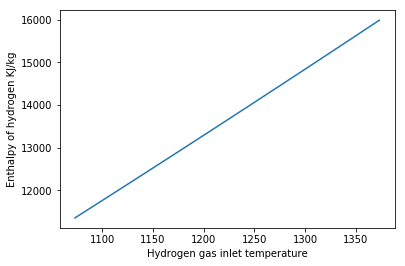

In [27]:
import matplotlib.pyplot as plt 
plt.plot(T2_hydrogen,H2_en_per_kg)
plt.xlabel('Hydrogen gas inlet temperature')
plt.ylabel('Enthalpy of hydrogen KJ/kg')
plt.savefig('Enthalpy of hydrogen with temperature variation.svg')


## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

In [28]:
H2_per_mol=3 # to reduce 1 mole of iron oxide or hematite 3 moles of hydrogen are required.
H2_weight=3*mol_weight_H2 # Weight of H2 for one mole of Fe2O3 in grams
mol_weight_fe2o3=159.688 # Molecular weight of hematite
H2_per_fe2o3=((1000/(mol_weight_fe2o3))*(H2_weight))# Weight of H2 in grams required for 1 kg of Fe2O3
H2_per_ton=(H2_per_fe2o3*1000)/1000 # Weight of hydrogen in kg to reduce 1 ton of Fe2O3

print(" Hydrogen required to reduce 1 ton of iron oxide in kg :", H2_per_ton)

 Hydrogen required to reduce 1 ton of iron oxide in kg : 37.87159961925756


### Hydrogen required for reduction of iron oxide for  1 ton of Fe and FeO production (Stoichiometric)

In [29]:
H2_per_ts=H2_per_ton*iron_ore_dri*Total_fe2O3 # only  iron ore reacts with hydrogen
print ("Hydrogen required for 1 ton of iron production in the shaft furnace, stoichiometric value in kg :",H2_per_ts)

Hydrogen required for 1 ton of iron production in the shaft furnace, stoichiometric value in kg : 54.10228517036794


 ### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)

In [30]:
lambda_h2=[]
for i in range(2,9):
    lambda_h2.append(i/2) # Iteratively add values to the list of lambda_h2 to see the effect of increasing lambda_h2
H2_actual_ts=(H2_per_ts*lambda_h2[1]) # Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",H2_actual_ts,lambda_h2)

Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : 81.15342775555192 [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]


Enthalpy of hydrogen with different values of lambda: [614449.3182985573, 634927.1558560388, 655471.3758125316, 676083.6057724251, 696765.2108782253, 717517.3229564752, 738340.8660889518, 759236.5791103999, 780205.0354553177, 801246.660711198, 822361.7481816062, 843550.4727174658, 864812.9030372711, 921673.977447836, 952390.7337840581, 983207.0637187974, 1014125.4086586377, 1045147.8163173379, 1076275.9844347127, 1107511.2991334277, 1138854.8686656, 1170307.5531829766, 1201869.991066797, 1233542.6222724093, 1265325.7090761987, 1297219.3545559067, 1228898.6365971146, 1269854.3117120776, 1310942.7516250631, 1352167.2115448501, 1393530.4217564506, 1435034.6459129504, 1476681.7321779036, 1518473.1582207999, 1560410.0709106354, 1602493.321422396, 1644723.4963632124, 1687100.9454349317, 1729625.8060745422, 1536123.2957463933, 1587317.889640097, 1638678.4395313289, 1690209.0144310626, 1741913.027195563, 1793793.307391188, 1845852.1652223796, 1898091.4477759998, 1950512.5886382943, 2003116.651

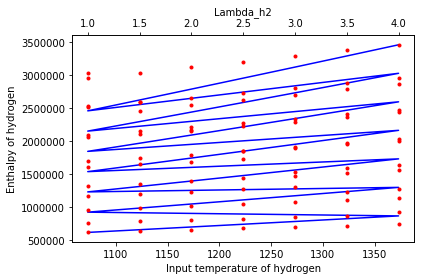

In [49]:
H_h2=[]
for i in range(7):
    for j in range(13):
          H_h2.append((H2_per_ts*H2_en_per_kg[j]*lambda_h2[i]))# To find the value of input energy based on the variation in lambda in KJ                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
print("Enthalpy of hydrogen with different values of lambda:",H_h2,len(H_h2))
temp_h2=[]
lambda_h2_plot=[]
for i in range(7):
    for j in range(13):
        temp_h2.append(T2_hydrogen[j])
for i in range(13):
    for j in range(7):
        lambda_h2_plot.append(lambda_h2[j])

figure, axis1 = plt.subplots()
axis1.plot(temp_h2,H_h2, 'b-')
axis1.set_xlabel('Input temperature of hydrogen')
# Make the y-axis label, ticks and tick labels match the line color.
axis1.set_ylabel('Enthalpy of hydrogen', color='black')
axis1.tick_params('y', colors='black')

axis2 = axis1.twiny()
axis2.plot(lambda_h2_plot,H_h2, 'r.')
axis2.set_ylabel('Enthalpy of hydrogen', color='g')
axis2.set_xlabel('Lambda_h2')
axis2.tick_params('y', colors='r')

figure.tight_layout()
plt.show()

## Reaction enthalpy calculation

In [31]:
fe2o3_hem = 1
h2_hem = 3
fe_hem = 2
h2o_hem = 3
dHb_fe2o3 = -825500 #		 '[J/mol] formation enthalpy of hematite
dHb_w = -242000 #	 '[J/mol] formation enthalpy of water (gaseous)
dHr_hem = (dHb_w * h2o_hem) - dHb_fe2o3 #'[J/mol] reaction enthalpy
print("Reaction enthalpy in Joule per mole: ",dHr_hem) 
dhr_hem_kj=dHr_hem/1000 # reaction enthalpy kJ/mol
print("Reaction enthalpy in KiloJoule per mole : ",dhr_hem_kj) 
dhr_hem_kj_kg=(dhr_hem_kj/mol_weight_fe2o3)*1000 # reaction ethalpy in kj/kg
print("Reaction enthalpy in Kj/Kg of heamtite: ",dhr_hem_kj_kg)
dhr_hem_kj_ton=dhr_hem_kj_kg*1000
print("Reaction enthalpy in kj per ton of heamtite : ",dhr_hem_kj_ton) # kJ/ton of fe2O3 
dhr_per_ts=dhr_hem_kj_ton*iron_ore_dri*Total_fe2O3 
print("Reaction enthalpy in kJ/ton of liquid steel : ",dhr_per_ts) # Amount of heat to be supplied in kJ for production of 1 ton of molten steel

Reaction enthalpy in Joule per mole:  99500
Reaction enthalpy in KiloJoule per mole :  99.5
Reaction enthalpy in Kj/Kg of heamtite:  623.0900255498221
Reaction enthalpy in kj per ton of heamtite :  623090.0255498221
Reaction enthalpy in kJ/ton of liquid steel :  890128.6079283174


## Waste gas stream enthalpy calculation

It is assumed that the waste gas stream is a mixture of hydrogen and water. Percentage of gas in each stream can be calculated by considering the stoichiometry. The temperature of the waste stream gases can be altered to see the impact on the energy consumption of the shaft furnace. 

### Mass flow rate of hydrogen and water 

In [32]:
# Mass flow rate of water in the waste stream per ton of steel production
mol_weight_H2O=18.0153 #in grams
water_tls=(mol_weight_H2O/mol_weight_fe)*1000
print("Amount of water in the waste stream per ton of steel production in kg/tls",water_tls) #kg/tls
## Calculation of the hydrogen in the waste stream 
H2_waste_stream=[]
for j in range(7):
    H2_waste_stream.append(H2_per_ts*(lambda_h2[j]-1)) #Kg/tls 
print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",H2_waste_stream) # The value varies with input flow rate of hydrogen inside the shaft furnace

Amount of water in the waste stream per ton of steel production in kg/tls 322.59468170829973
Amount of hydrogen in the waste stream per ton of steel production in kg/tls [0.0, 27.05114258518397, 54.10228517036794, 81.15342775555192, 108.20457034073588, 135.25571292591985, 162.30685551110383]


### Enthalpy of water/steam

Enthalpy of water at different outlet temperatures [11.338929733643681, 12.257198339087807, 13.182866102480517, 14.116028984625444, 15.056771389857602, 16.005167104592715, 16.961280053752432, 17.925164915003933, 18.896867621048386, 19.876425773061158, 20.86386898309422, 21.85921915928438]
Enthalpy per Kg of Water in kJ/kg : [629.405546043845, 680.3771427113513, 731.7594546013953, 783.5578083421005, 835.7768890808147, 888.4207925814566, 941.493067212449, 994.9967480421604, 1048.9343847201205, 1103.308064426413, 1158.1194308778772, 1213.3697001595522]


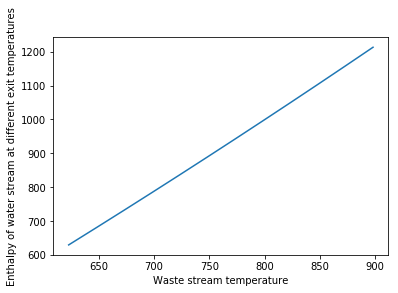

In [33]:
T_waste=[623,648,673,698,723,748,773,798,823,848,873,898]# K Temperature of the exhaust gas leaving the reduction shaft furnace
H2O_EN_per_kg=[]
H2O_En_per_mol=[]
def H2O_enthalpy(T):# 500 -1700 K reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
for i in range(12):
    H2O_En_per_mol.append(H2O_enthalpy(T_waste[i]))
    mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg
print("Enthalpy of water at different outlet temperatures",H2O_En_per_mol)
for j in range(12):
    H2O_EN_per_kg.append((mol_per_kg_H2O)*(H2O_En_per_mol[j]))

print("Enthalpy per Kg of Water in kJ/kg :",H2O_EN_per_kg)
plt.plot(T_waste,H2O_EN_per_kg)
plt.xlabel('Waste stream temperature')
plt.ylabel('Enthalpy of water stream at different exit temperatures')
plt.savefig('Variation of water stream enthalpy with exit temperature')

### Enthalpy of the waste stream

The waste stream is assumed to be composed of hydrogen and water/steam. In order to calculate the enthalpy of the waste stream the specific enthalpy of hydrogen and water at the waste gas outlet gas temperature needs to be calculated and multiplied with the mass flow rate of the individual streams.

In [34]:
# Energy in the waste stream varying with lambda
H_offgas=[]
for k in range(7):
    for i in range(12):
        H_offgas.append((water_tls*H2O_EN_per_kg[i]) +(H2_waste_stream[k]*H2_enthalpy_1(T_waste[i])*(1000/mol_weight_H2)))
        #print("lambda_h", lambda_h2[k])
        #print("T_waste temperature",T_waste[i])
#print("Energy in the waste stream in Kj/tls",H_offgas,len(H_offgas))
df_w=pd.read_csv('Waste_stream_temperature.csv')
df_w['Enthalpy of waste stream']=H_offgas
df_w.to_csv('Waste gas enthalpy.csv', encoding='utf-8', index=False)

#plt.plot(lambda_h2,H_offgas,'o')
#plt.xlabel('lambda_h2')
#plt.ylabel('Offgas enthalpy in Kj/tls')

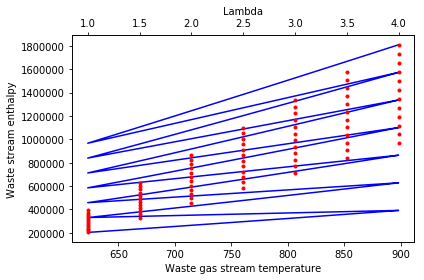

In [35]:
fig, ax1 = plt.subplots()
ax1.plot(df_w['Temperature '],df_w['Enthalpy of waste stream'], 'b-')
ax1.set_xlabel('Waste gas stream temperature')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Waste stream enthalpy', color='black')
ax1.tick_params('y', colors='black')

ax2 = ax1.twiny()
ax2.plot(df_w['Lambda'],df_w['Enthalpy of waste stream'], 'r.')
ax2.set_ylabel('Waste strean enthalpy', color='g')
ax2.set_xlabel('Lambda')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## Energy contained in the solid stream exiting the DRI
It is assumed that the solid stream is a mixture of iron, iron oxide and impurities such as silica and alumina. The solid stream exits the reactor at a temperature of 600 C. 

In [36]:
"""Enthalpy of the residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""
# The constants are used for a temperature range of 298-1650 K and the fusion enthalpy is added in the mix to account for the latent heat of fusion , whcih is an endothermic reaction
T_dri_exit=[773,798,823,848,873,898,923,948,973,998,1023,1048] # Exit temperature of the FeO stream contained in the solid stream exiting the reactor
En_per_mol_feo =[]
En_per_ton_feo=[]
mol_per_ton_feo=1000000/mol_weight_feo# 1 ton= 10^6 grams
En_feo=[]
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
for i in range(12):
    En_per_mol_feo.append(feo_enthalpy(T_dri_exit[i])) # Using a loop to get enthalpy of Feo under different temperatures
for k in range(12):
    En_per_ton_feo.append(En_per_mol_feo[k]*mol_per_ton_feo) # Enthalpy calculation for different percentages of feo based on differetn metallization rates

for i in range(6):
    for j in range(12):
        En_feo.append(En_per_ton_feo[j]*Feo_percentage[i])
        #print("Temperature",T_dri_exit[j])
        #print("alpha",alpha[i])
#print("Energy per mole feo :",En_per_mol_feo)
#print("Energy per ton feo :",En_per_ton_feo)
#print("Energy contained in the feo stream exiting the reactor",En_feo) #In Kj/tls

### Energy contained in the iron ore stream
En_per_mol_fe=[]
En_fe=[]
def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
#H_f=247000 # Melting enthalpy of steel per ton in Kj/ton https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
for i in range(12):
    En_per_mol_fe.append(fe_enthalpy(T_dri_exit[i]))# Enthalpy of direct reduced iron at the output of the reactor
print(En_per_mol_fe)
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams
for i in range(6):
    for k in range(12):
        En_fe.append(En_per_mol_fe[k]*mol_per_ton_fe*iron_ore_dri*Total_fe2O3*(alpha[i])*iron_oxygen_ratio)
#print("Energy per ton of DRI", En_fe) #In Kj/ton
df_ex=pd.read_csv('alpha_temperature.csv')
df_ex['En_fe']=En_fe
df_ex['En_feo']=En_feo
df_ex.head(10)
df_ex.to_csv('waste stream enthalpy', encoding='utf-8', index=False)

[13.51232067611605, 14.276007620731134, 15.044924592624996, 15.819071592678428, 16.598448621690686, 17.383055680362148, 18.17289276927975, 18.96795988890478, 19.768257039562492, 20.573784221433336, 21.384541434545433, 22.200528678768144]


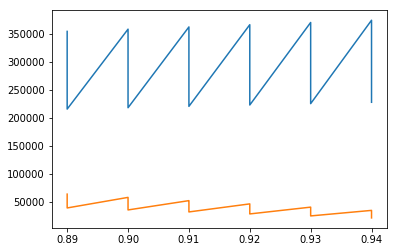

In [37]:
plt.plot(df_ex['Alpha'],df_ex['En_fe'],df_ex['Alpha'],df_ex['En_feo'])

Energy exiting through the impurities contained in the solid stream at Exit temperatures: [42181.20440537318, 43435.02185804731, 44693.53976664292, 45956.76067261461, 47224.68668229567, 48497.31953364161, 49774.66065212662, 51056.71119779621, 52343.47210506532, 53634.944116535524, 54931.12781185313, 56232.02363243727]


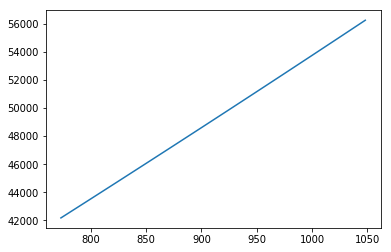

In [38]:
H_imp=[]
for j in range(12):
    H_imp.append((sio2_enthalpy(T_dri_exit[j])*mol_per_ton_sio2*SIO2_weight) +(Al2O3_enthalpy(T_dri_exit[i])*mol_per_ton_al2o3*AL2O3_weight))
print("Energy exiting through the impurities contained in the solid stream at Exit temperatures:",H_imp)
plt.plot(T_dri_exit,H_imp)

In [39]:
H_imp_list=[]
for i in range(6):
    for j in range(12):
        H_imp_list.append(H_imp[j]) # making a list with equal values of terms


<Figure size 2160x1440 with 0 Axes>

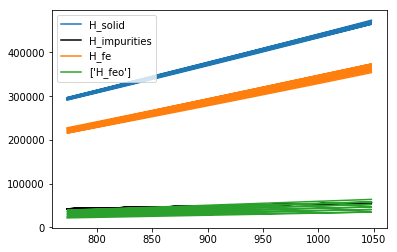

<Figure size 2160x1440 with 0 Axes>

In [40]:
df_ex['H_imp']=H_imp_list
df_ex['H_solid'] =  df_ex[['En_fe', 'En_feo','H_imp']].sum(axis=1)
df_ex.to_csv('Solid stream enthalpy.csv', encoding='utf-8', index=False)
plt.plot(df_ex['Temperature'],df_ex['H_solid'],label='H_solid')
plt.plot(df_ex['Temperature'],df_ex['H_imp'],label='H_impurities',color='black')
plt.plot(df_ex['Temperature'],df_ex['En_fe'],label='H_fe')
plt.plot(df_ex['Temperature'],df_ex['En_feo'],label=['H_feo'])
plt.legend(loc='upper left')
plt.figure(figsize=(30,20))


## Energy balance for the shaft furnace 

H_h2=H_Fe2O3 + H_solid + H_offgas+ reaction_enthalpy